<a href="https://colab.research.google.com/github/jinghaotong/infographic/blob/main/Copy_of_CADRE_DAPpyr_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAPpyr Tutorial

DAPpyr ((D)ata (A)ssimilation (P)oterjoy (py)thon (r)elease) is a data assimilation python implementation. This module serves to provide a basic environment to learn and test data assimilation methods, as well as a basis for developing further data assimilation methods in a toy environment.

The following notebook goes through the basic structure of the package and provides examples.

**Author: Maria Nikolaitchik, University of Maryland**

## Introduction

First, grab DAPpyr from a google drive folder.

In [1]:
!gdown --folder 'https://drive.google.com/drive/folders/u/2/folders/13x_DOox2xui3s7epa9KUBv_BjwbOv445'

Retrieving folder contents
Retrieving folder 1F3cXeKmQjRoDR4CIwtuV0U-kQR4tpr9O __pycache__
Processing file 1t4GRTHAIkUny5XduzdNsK6zsp4j9TrcK __init__.cpython-310.pyc
Processing file 1xews2LMeDHZOQG4zGE_MeJJEBXlfubV2 __init__.cpython-311.pyc
Processing file 1QTpYrPton6HMRGSWecCFu-EVpG_WHOya __init__.cpython-313.pyc
Processing file 1ZvJaQUyzViwDYQ-JK9G0hAw5rajKPoyO DA.cpython-310.pyc
Processing file 1wj2ZLFJ9xB82-s7HFt96-rQ5CvTfqLDR DA.cpython-311.pyc
Processing file 1ryPr0nKNAW9ZrrexYVroM5_Ng85kkkh2 Exceptions.cpython-310.pyc
Processing file 1_BiWC_Wc36k70ob-L6efadUhUyd1kqOg Exceptions.cpython-311.pyc
Processing file 18-W1ukhSZKZ6SZx4ldKHKd98WQ72QTSj MISC.cpython-310.pyc
Processing file 1RNrepFdumuCRN8_-yI_EQ8h2rnnp7Trk MISC.cpython-311.pyc
Processing file 1wDtyflXnzAaegXj3M0yIKaip7YSm36cz MODELS.cpython-310.pyc
Processing file 1TxIbhY__ADO0pEsIrYJSPfcXCmkBJjAi MODELS.cpython-311.pyc
Processing file 14FEq8NPlPOXx9ume9qWeBOYAprZ6HUob MODELS.cpython-313.pyc
Retrieving folder 1RAOgs8JT1ccV

Next, we must import our module, DAPpyr, as well as numpy and matplotlib for additional array manipulation and plotting later on. DAPpyr requires the following packages to function:

* Numpy
* Matplotlib
* Scipy
* Numba
* Xarray
* Numbalsoda

If you are using a package manager like conda, these can all be installed using the default and conda-forge channels. For this tutorial, only numbalsoda needs to be installed manually.

In [2]:
!pip install numbalsoda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numbalsoda: filename=numbalsoda-0.3.4-cp311-cp311-linux_x86_64.whl size=95738 sha256=8b4a0ba22b230f92c6ed8f54329e123997c46e9a1710160e4f94ce7c18c51478
  Stored in directory: /root/.cache/pip/wheels/85/ab/48/c0089753742920fead54765e14f11fbb59a1449612c25d5dca
Successfully built numbalsoda


In [3]:
import DAPpyr as dap
import numpy as np
import matplotlib.pyplot as plt

There are two main pieces of the `DAPpyr` module. The `Expt()` class and the `runDA` function.

The `Expt` sets up the experiment you want to run. Through this class, you can configure things like the type of model you wish to run, how long to run it for, and what data assimilation method to use.

The `Expt` class takes in a string for the name of the experiment, and an optional `params` dictionary containing any settings you with to change. Initializing an experiment without providing a `params` dictionary sets all configurable variables to their default values.

Below, we will create an experiment call "Basic_Expt". We will run a 40 member ensemble 200 time steps using Lorenz 96 as our toy model.

In [4]:
expt  = dap.Expt('Basic_Expt', {'expt_flag': 0, "Ne": 40, 'model_flag':1, 'T': 200,'obf':2})

If you need a reminder of what settings an experiment has configured, simply print the experiment out.

In [5]:
print(expt)


            ------------------
            Basic Information
            ------------------
            Experiment Name: Basic_Expt
            Ne: 40 # Number of Ensemble Members
            T: 200 # Number of Time Periods
            dt: 0.05 # Width of Timesteps

            ------------------
            Model Information
            ------------------
            model_flag: 1 # Model used in forward integration
                  0: Lorenz 1963 (Nx = 3)
                  1: Lorenz 1996 (Nx = 40)
                  2: Lorenz 2005 (Nx  = 480)
            Nx: 40 # The number of state variables
            
            params: {'s': 10, 'r': 28, 'b': 2.6666666666666665, 'F': 8, 'l05_F': 15, 'l05_Fe': 15, 'l05_K': 32, 'l05_I': 12, 'l05_b': 10.0, 'l05_c': 2.5} # Parameters to tune each forecast model
            Above is a list of all the parameters stored for use in the forecast model
                  Lorenz 1963: [s, r, b]
                  Lorenz 1996: [F]
                  Lorenz 2

To get the results of a single parameter in the experiment use the `Expt.getParam()` method to retrieve it.

In [6]:
print('Getting the model_flag used')
expt.getParam('model_flag')

Getting the model_flag used


1

To change a parameter in the experimental setup, use the `Expt.modExpt()` method.

NOTE: Modifying certain parameters in your experiment (such as the number of ensemble members (Ne) or number of model time steps (T)) will force the experiment to rerun spin-up, meaning that you will have new *model truth values, observations, and ensemble states. Certain few parameters (such as the DA method to use (expt_flag)) will not change the experimental initial states.

In [7]:
#Lets change the DA method from EnSRF to LPF
expt.modExpt({'expt_flag': 1})
print('Note that the expt_flag is now set to use the LPF instead of the EnSRF')
expt.getParam('expt_flag')

Note that the expt_flag is now set to use the LPF instead of the EnSRF


1

Once you are happy with your experiment, it is time to run the actual data assimilation cycles. To do this, use the `DAPpyr.runDA()` function. It simply takes in an `Expt` instance, and runs through all specifications of the experiment.

In [8]:
# Lets run our basic experiment, after running, it should print a "completed" message
dap.runDA(expt)

'completed'

From here, there are a number of outputs you can reference.

* `Expt.rmse`: The posterior RMSE over the experiment
* `Expt.prior_rmse`: The prior RMSE over the experiment
* `Expt.spread`: A (T x 2) matrix where [:, 0] are the prior ensemble spreads, and [:, 1] are the posterior ensemble spreads
* `Expt.x_ens`: If "saveEns" is set to 1 in configuration, the full posterior ensemble states are stored
* `Expt.x_ensmean`: If "saveEnsMean" is set to 1 in configuration, the full posterior ensemble means are stored
* `Expt.x_fore_ens`: If "saveForecastEns" is set to 1 in configuration, the full prior ensemble states are stored

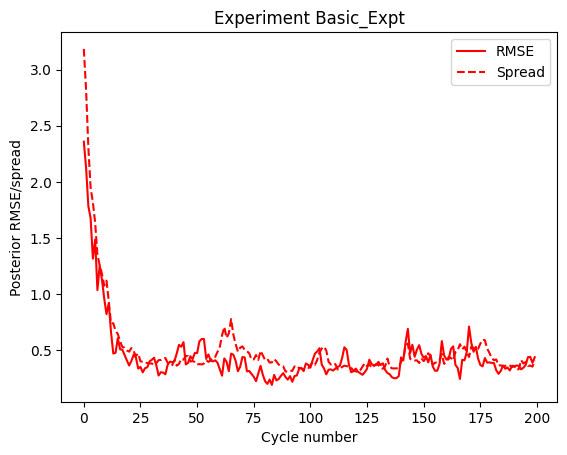

In [9]:
plt.plot(expt.rmse,'r-')
plt.plot(expt.spread[:,1],'r--')
plt.title('Experiment {}'.format(expt.exptname))
plt.xlabel('Cycle number')
plt.ylabel('Posterior RMSE/spread')
plt.legend(['RMSE','Spread'])

If you would like to visualize model states at various times during the experiment, use the "plotExpt" function. For example, this is how you would visualize the ensemble for the first and 100th cycles.

<Axes3D: >

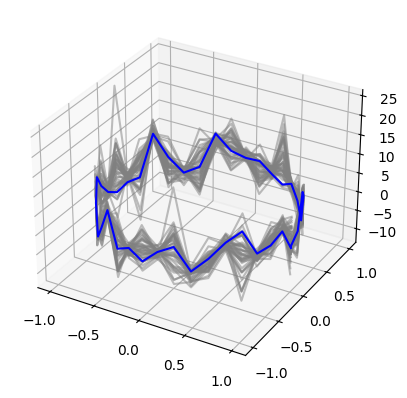

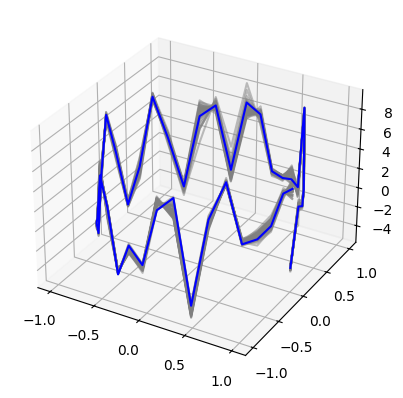

In [10]:
dap.plotExpt(expt, 1, ax = None, plotObs = False, plotEns = True, plotEnsMean = False)
dap.plotExpt(expt, 100, ax = None, plotObs = False, plotEns = True, plotEnsMean = False)

## Ensemble Filter Comparison

Now, lets compare the Whitaker and Hamill (2002) ensemble square root filter to the local particle filter.

Start with an easy (Gaussian) case.

In [11]:
expt1  = dap.Expt('EnKF', {'expt_flag': 0, "Ne": 40, 'model_flag':1, 'T': 200,'h_flag':0,'obf':2})
expt2  = dap.Expt('LPF', {'expt_flag': 1, "Ne": 40, 'model_flag':1, 'T': 200,'h_flag':0,'obf':2})

In [12]:
dap.runDA(expt1)
dap.runDA(expt2)

'completed'

Text(0.5, 1.0, 'Gaussian case')

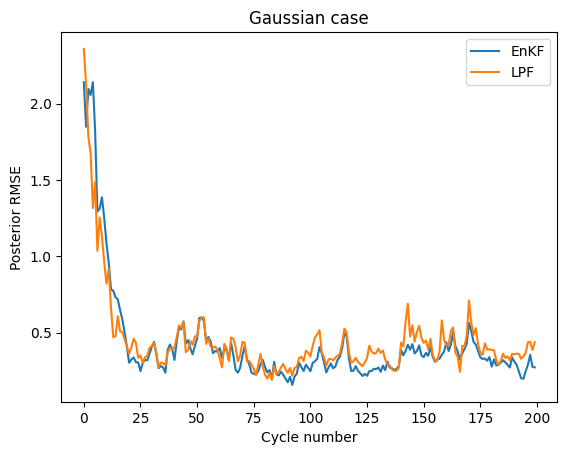

In [13]:
plt.plot(expt1.rmse)
plt.plot(expt2.rmse)
plt.xlabel('Cycle number')
plt.ylabel('Posterior RMSE')
plt.legend([expt1.exptname,expt2.exptname])
plt.title('Gaussian case')

It is difficult to do better than Kalman filters when their assumptions are close to being satisfied!

Let's force the posterior to be non-Gaussian by introducing a nonlinear measurement operator. In this case, choose h_flag = 1, which uses $H(x) = x_k^2$ for states at select grid points $k = 1 ... N_y$

In [14]:
expt3  = dap.Expt('EnKF', {'expt_flag': 0, "Ne": 40, 'model_flag':1, 'T': 200,'h_flag':1,'obf':2,'sig_y':1,'var_y':1})
expt4  = dap.Expt('LPF', {'expt_flag': 1, "Ne": 40, 'model_flag':1, 'T': 200,'h_flag':1,'obf':2,'sig_y':1,'var_y':1})

In [15]:
dap.runDA(expt3)

'completed'

In [16]:
dap.runDA(expt4)

'completed'

Text(0.5, 1.0, 'Non-Gaussian case')

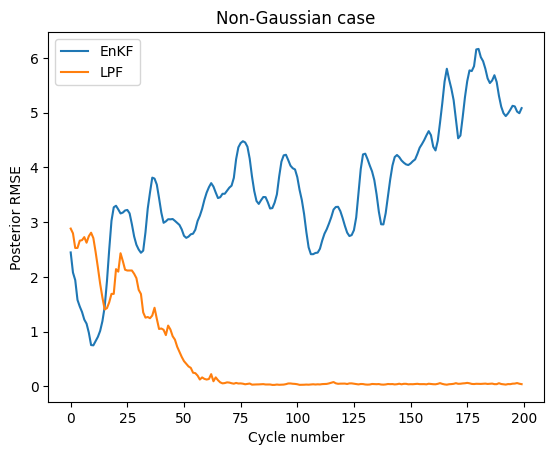

In [17]:
plt.plot(expt3.rmse)
plt.plot(expt4.rmse)
plt.xlabel('Cycle number')
plt.ylabel('Posterior RMSE')
plt.legend([expt3.exptname,expt4.exptname])
plt.title('Non-Gaussian case')

Now, let's try to break the current local particle filter configuration by reducing the number of observations. This can be done by increasing "obf" which increases the spacing between observations over the domain.

In [18]:
expt5  = dap.Expt('LPF', {'expt_flag': 1, "Ne": 40, 'model_flag':1, 'T': 200,'h_flag':1,'obf':4,'sig_y':1,'var_y':1})
dap.runDA(expt5)

'completed'

Text(0.5, 1.0, 'Non-Gaussian case')

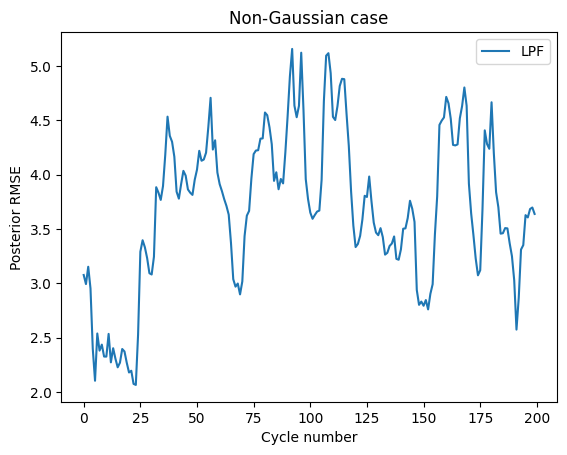

In [19]:
plt.plot(expt5.rmse)
plt.xlabel('Cycle number')
plt.ylabel('Posterior RMSE')
plt.legend([expt5.exptname])
plt.title('Non-Gaussian case')

The number of particles is likely too small for this problem. Try increasing the ensemble size.